# 分类

In [1]:
import pandas as pd
df = pd.read_csv('myData.csv')
df.head()

,id,yingyu,yuwen,shuxue,lable
0,0,92,87,67,1
1,1,90,88,78,2
2,2,75,55,82,3
3,3,60,60,89,3
4,4,81,85,80,1


In [2]:
myResult = df.drop(['yingyu'],axis = 1)
myResult.head()

,id,yuwen,shuxue,lable
0,0,87,67,1
1,1,88,78,2
2,2,55,82,3
3,3,60,89,3
4,4,85,80,1


In [3]:
len(df)

100

In [4]:
train_x = df.iloc[0:80,2:4]
train_x.head()

,yuwen,shuxue
0,87,67
1,88,78
2,55,82
3,60,89
4,85,80


In [5]:
train_y = df.iloc[0:80,4].values
train_y[0:5]

array([1, 2, 3, 3, 1], dtype=int64)

In [6]:
test_x = df.iloc[80:100,2:4]
test_x.head()

,yuwen,shuxue
80,76,78
81,75,88
82,61,82
83,68,88
84,81,74


In [14]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier()

In [16]:
model.fit(train_x,train_y)

KNeighborsClassifier()

In [20]:
model.predict(test_x)


array([2, 3, 3, 3, 1, 1, 3, 2, 3, 1, 3, 1, 1, 2, 3, 2, 2, 1, 2, 1],
      dtype=int64)

In [22]:
train_p = model.predict(train_x)
train_p

array([1, 2, 3, 3, 2, 3, 2, 3, 1, 2, 3, 3, 2, 3, 3, 1, 3, 1, 1, 3, 3, 1,
       1, 3, 1, 1, 2, 3, 2, 3, 2, 2, 3, 2, 1, 3, 3, 2, 3, 2, 2, 2, 2, 1,
       2, 1, 1, 3, 2, 3, 1, 2, 1, 3, 3, 3, 1, 2, 2, 3, 3, 3, 1, 1, 1, 3,
       2, 3, 3, 1, 3, 2, 1, 3, 3, 1, 2, 2, 1, 1], dtype=int64)

In [23]:
train_y

array([1, 2, 3, 3, 1, 3, 2, 3, 1, 2, 3, 3, 2, 3, 3, 1, 3, 1, 1, 3, 3, 1,
       1, 3, 1, 1, 2, 3, 2, 3, 2, 2, 3, 3, 1, 3, 3, 2, 3, 2, 2, 2, 1, 1,
       2, 2, 1, 3, 2, 3, 1, 2, 1, 3, 3, 3, 1, 2, 2, 3, 2, 3, 1, 1, 2, 3,
       2, 3, 3, 1, 3, 2, 1, 3, 3, 1, 3, 1, 1, 1], dtype=int64)

In [25]:
classifyResult = pd.DataFrame(train_p,columns=['classifyResult'])
classifyResult.head()

,classifyResult
0,1
1,2
2,3
3,3
4,2


In [26]:
myResult=pd.merge(myResult,classifyResult,right_index=True,left_index=True)
myResult.head()

,id,yuwen,shuxue,lable,classifyResult
0,0,87,67,1,1
1,1,88,78,2,2
2,2,55,82,3,3
3,3,60,89,3,3
4,4,85,80,1,2


## 聚类
#### KMeans算法

In [28]:
import numpy as np
train_x2 = np.array(train_x[['yuwen','shuxue']])
train_x2.shape
#80个同学。每个人2个特征

(80, 2)

In [29]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = 3)
model2

KMeans(n_clusters=3)

In [30]:
model2=model2.fit(train_x2)
model2

KMeans(n_clusters=3)

In [34]:
model2.labels_
#预测数据

array([0, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0,
       0, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 2, 1,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 2])

In [35]:
train_y
#真实样本

array([1, 2, 3, 3, 1, 3, 2, 3, 1, 2, 3, 3, 2, 3, 3, 1, 3, 1, 1, 3, 3, 1,
       1, 3, 1, 1, 2, 3, 2, 3, 2, 2, 3, 3, 1, 3, 3, 2, 3, 2, 2, 2, 1, 1,
       2, 2, 1, 3, 2, 3, 1, 2, 1, 3, 3, 3, 1, 2, 2, 3, 2, 3, 1, 1, 2, 3,
       2, 3, 3, 1, 3, 2, 1, 3, 3, 1, 3, 1, 1, 1], dtype=int64)

In [36]:
clusterResult = pd.DataFrame(model2.labels_,index=train_x.index,columns=['clusterResult'])
clusterResult.head()

,clusterResult
0,0
1,2
2,1
3,1
4,2


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
# 二维数据画图
# 数据集的输入，类别数，中性点，数据集的标签
def showCluster(dataSet,k,centroids,clusterAssment):
    numSamples,dim = dataSet.shape
    if dim !=2:
        print("Sorry!I can not draw because the dimension of your data is not 2!")
        return 1
    # 颜色
    mark = ['or','ob','og','ok','^r','+r','sr','dr','<r','pr']
    if k>len(mark):
        print("Sorry! Your k is too large! Please contact Zouxy!")
        return 1
    # 画样本
    for i in range(numSamples):
        markIndex = int(clusterAssment[i,0])
        plt.plot(dataSet[i,0],dataSet[i,1],mark[markIndex])
    mark = ['Dr','Db','Dg','^b','+b','sb','db','<b','pb']
    # 画质心
    for i in range(k):
        plt.plot(centroids[i,0],centroids[i,1],mark[i],markeredgecolor='k',markersize=14)
    plt.show()

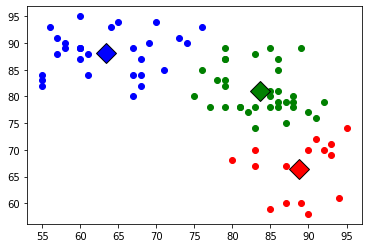

In [42]:
import numpy as np
train_x_array = np.array(train_x[['yuwen','shuxue']])
showCluster(train_x_array,3,model2.cluster_centers_,model2.labels_.reshape(-1,1))

In [50]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# 绘图

plotX = train_x.iloc[0:80,0:2].values
plotP = train_p

In [55]:
x1_min= plotX[:,0].min()
x1_max = plotX[:,0].max()
# 英语最低分和最高分
x2_min =  plotX[:,1].min()
x2_max =plotX[:,1].max()
# 数学
x1,x2 = np.mgrid[x1_min:x1_max:80j,x2_min:x2_max:80j] 
# 生成网格采样点（56-96）

<function matplotlib.pyplot.show(*args, **kw)>

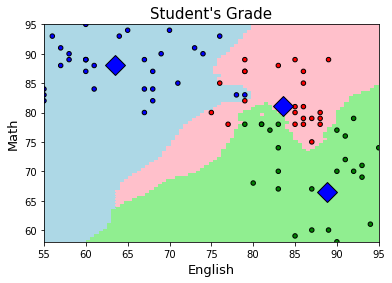

In [65]:
grid_test = np.stack((x1.flat,x2.flat),axis=1)
grid_hat = model.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)

cm_light = mpl.colors.ListedColormap(['lightgreen','pink','lightblue'])
cm_dark = mpl.colors.ListedColormap(['g','r','b'])
# cm_dark1 = mpl.colors.ListedColormap(['darkgreen','darkred','darkblue'])
# 画分类图，绘制背景
plt.pcolormesh(x1,x2,grid_hat,cmap=cm_light)
# 画样本点
plt.scatter(plotX[:,0],plotX[:,1],c=plotP,edgecolors='black',s=20,cmap=cm_dark)

mark = ['Dr','Db','Dg','Dk','^b','+b','sb','db','<b','pb']
for i in range(3):
    plt.plot(model2.cluster_centers_[i,0],model2.cluster_centers_[i,1],mark[1],markeredgecolor='k',markersize=14)
    
plt.xlabel('English',fontsize = 13)
plt.ylabel('Math',fontsize=13)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('Student\'s Grade',fontsize=15)
plt.show

In [58]:
myResult = pd.merge(myResult,clusterResult+1,right_index=True,left_index=True)
myResult.head()

,id,yuwen,shuxue,lable,classifyResult,clusterResult
0,0,87,67,1,1,1
1,1,88,78,2,2,3
2,2,55,82,3,3,2
3,3,60,89,3,3,2
4,4,85,80,1,2,3
